In [1]:
import pandas as pd

In [2]:
!pip install openpyxl


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [4]:

# Load specific sheet (recommended)
df = pd.read_excel("online_retail.xlsx", sheet_name="Year 2010-2011")

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# Remove cancelled invoices
df = df[~df['Invoice'].astype(str).str.startswith('C')]

# Remove missing Customer ID
df = df.dropna(subset=['Customer ID'])

# Convert date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df['TotalAmount'] = df['Quantity'] * df['Price']


In [8]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'Invoice': 'count',
    'TotalAmount': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']

rfm.head()


,Recency,Frequency,Monetary
Customer ID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [9]:
rfm['R_score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])

rfm['RFM_Score'] = rfm['R_score'].astype(str) + \
                   rfm['F_score'].astype(str) + \
                   rfm['M_score'].astype(str)

rfm.head()


,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
Customer ID,,,,,,,
12346.0,326,1,77183.60,1,1,4,114
12347.0,2,182,4310.00,4,4,4,444
12348.0,75,31,1797.24,2,2,4,224
12349.0,19,73,1757.55,3,3,4,334
12350.0,310,17,334.40,1,1,2,112


In [10]:
def segment_customer(row):
    if row['RFM_Score'] == '444':
        return 'Champions'
    elif row['R_score'] >= 3 and row['F_score'] >= 3:
        return 'Loyal'
    elif row['R_score'] <= 2 and row['F_score'] >= 3:
        return 'At Risk'
    elif row['R_score'] == 1:
        return 'Lost'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)


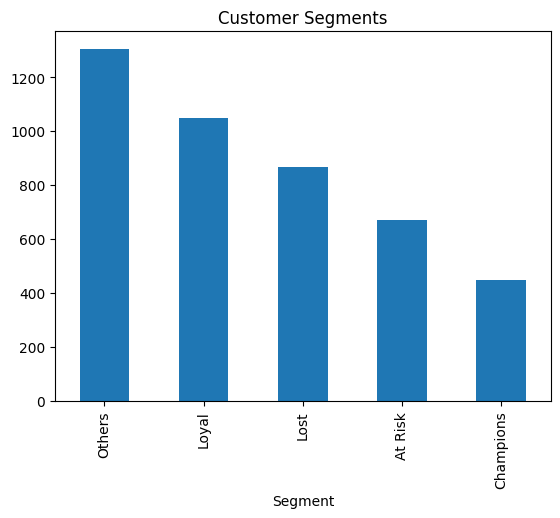

In [11]:
rfm['Segment'].value_counts().plot(kind='bar')
plt.title("Customer Segments")
plt.show()


In [12]:
rfm.to_csv("rfm_segments.csv")

from google.colab import files
files.download("rfm_segments.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
with open("segment_actions.txt", "w") as f:
    f.write("Champions:\n")
    f.write("- Exclusive offers\n- Loyalty rewards\n- Referral programs\n\n")

    f.write("Loyal:\n")
    f.write("- Cross-sell premium items\n- Membership upgrades\n- Personalized emails\n\n")

    f.write("At Risk:\n")
    f.write("- Discount coupons\n- Reminder emails\n- Special deals\n\n")

    f.write("Lost:\n")
    f.write("- Win-back campaigns\n- Big discounts\n- Feedback surveys\n")

files.download("segment_actions.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>